<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B3%BC%ED%95%99%20%EB%B0%A9%EB%B2%95%EB%A1%A0/%EA%B0%90%EC%84%B1_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import os
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 영화 리뷰

In [ ]:
# Open and inspect the first few lines of the provided file
# with open("ratings.txt", "r", encoding="utf-8") as file:
#     sample_data = file.readlines()[:10]

# sample_data

In [14]:
import pandas as pd

df_ratings = pd.read_csv("ratings.txt", sep="\t")
df_ratings

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [6]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [7]:
df_ratings.describe(include='all')

,id,document,label
count,2.000000e+05,199992,200000.000000
unique,NaN,194543,NaN
top,NaN,굿,NaN
freq,NaN,237,NaN
mean,6.739774e+06,NaN,0.500000
std,2.923504e+06,NaN,0.500001
min,3.300000e+01,NaN,0.000000
25%,4.760678e+06,NaN,0.000000
50%,7.527726e+06,NaN,0.500000
75%,9.248413e+06,NaN,1.000000


* 총 데이터 수: 200,000개
* id: 각 리뷰에 대한 고유 아이디입니다.
* document: 리뷰 텍스트입니다. 200,000개 중 199,992개의 데이터가 있습니다.
* label: 레이블이며, 0 또는 1의 값을 가집니다. 이 레이블은 리뷰의 감성을 나타낼 수 있습니다 (예: 긍정적인 리뷰 또는 부정적인 리뷰). 데이터는 균형을 이루고 있으며, 각각의 레이블에 100,000개의 리뷰가 있습니다.

In [15]:
# 널값 확인
df_ratings_cleaned = df_ratings.dropna()
null_counts = df_ratings_cleaned.isnull().sum()

null_counts

id          0
document    0
label       0
dtype: int64

In [16]:
# 타겟갯수
label_counts = df_ratings_cleaned['label'].value_counts()

label_counts

1    99996
0    99996
Name: label, dtype: int64

In [17]:
# 한글 주석 추가하여 코드 재작성
import re

# 한글 문자가 아닌 문자가 포함되어 있는지 확인하는 함수
def 한글_아닌_문자_포함(text):
    # 한글 문자, 공백 및 일반 구두점 외의 문자를 찾는 정규 표현식
    패턴 = re.compile(r"[^가-힣\s.,?!~]")
    return bool(패턴.search(text))

# 'document' 열에 함수 적용하여 한글 아닌 문자가 포함된 행 찾기
한글_아닌_리뷰 = df_ratings_cleaned[df_ratings_cleaned['document'].apply(한글_아닌_문자_포함)]

# 한글 아닌 문자가 포함된 리뷰의 수 및 샘플 리뷰 출력
한글_아닌_리뷰_수 = 한글_아닌_리뷰.shape[0]
한글_아닌_리뷰_샘플 = 한글_아닌_리뷰.sample(min(10, 한글_아닌_리뷰_수))

print(한글_아닌_리뷰_수)
한글_아닌_리뷰_샘플[['document', 'label']]

70382


,document,label
173013,영문 버젼 재미 없어요. 잉ㄹ본 버젼으로 구하셔서 보세요 ^^,0
149803,조조를 OO으로 만드네,0
102228,never watch this movie...it's the trash...,0
92432,젊은 해리슨 포드를 볼 수 있어서 좋았다. 1978에 이정도의 영화를 만들어 내다니...,1
137066,진짜 돈 아까워!!열라 내가 해도 그거보다 잘한다-_-,0
199263,147분 중 117분이 지루햇다.. 평점에 속지마시길..,0
157173,1점먹고 떨어져라..,0
158286,초반부터 혓바닥자르는장면. OOO기같은영화 정우성이아깝다,0
170354,평점가가 5점밖에안줬다고해서 왜비난받아야하냐? 1점주면서 쓰레기영화라고하는사람도있다...,0
144481,역시 신동엽잘하던데요~~ㅋㅋ 그리고 좀어수선한 느낌...,0


In [18]:
# 한글, 공백 및 일반 구두점을 제외한 모든 문자를 공백으로 변환하는 함수
def 한글_아닌_문자_제거(text):
    # 한글, 공백 및 일반 구두점 외의 문자를 찾아서 공백으로 변환
    변환된_텍스트 = re.sub(r"[^가-힣\s.,?!~]", " ", text)
    return 변환된_텍스트

# 'document' 열에 함수 적용하여 변환
df_ratings_cleaned['document'] = df_ratings_cleaned['document'].apply(한글_아닌_문자_제거)

# 변환 후 샘플 리뷰 확인
sample_after_conversion = df_ratings_cleaned.sample(10)

sample_after_conversion[['document', 'label']]

,document,label
174127,스토리를 조립하려고 무척 애를 썼지만 굉장히 허술함. 명함만 보고 무작정 식당으로 ...,0
11638,야구영화 중 제일 감동적이였던 영화,1
116342,무슨내용인지 모르겠다,0
178690,진짜 오글오글 덩어리,0
84318,긴장감이 배,1
187875,미안하지만 이은주 최악의 영화,0
168520,이런 대책없는 영화를 봤나,0
90014,내 인생영화... 어릴때 보고 커서도 봤는데 진짜 재미있다....,1
20379,배우들의 연기와 비록 불륜이었지만 한명도행복할수 없었던 결말 참 좋았어요,1
130162,평점... 속았다,0


## 데이터 분리

In [19]:
from sklearn.model_selection import train_test_split

# 데이터를 학습 데이터와 테스트 데이터로 분리 (80%: 학습, 20%: 테스트)
train_data, test_data = train_test_split(
    df_ratings_cleaned, test_size=0.2, random_state=42)

# 학습 데이터와 테스트 데이터의 크기 확인
train_size = train_data.shape[0]
test_size = test_data.shape[0]

train_size, test_size

(159993, 39999)

## 분석 모델 구축 : TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency)는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 방법입니다.

TF-IDF는 각 단어의 빈도와 전체 문서 집합에서의 그 단어의 등장 빈도의 역수를 곱하여 계산됩니다.

TF-IDF 피처를 생성하기 위해 TfidfVectorizer를 사용하겠습니다. 이를 위해 먼저 학습 데이터를 사용하여 TF-IDF 변환기를 학습시키고, 이 변환기를 사용하여 학습 데이터와 테스트 데이터의 피처를 생성하겠습니다.

In [20]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 43.3 MB/s eta 0:00:00


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환기 초기화
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# 학습 데이터를 사용하여 TF-IDF 변환기 학습
tfidf_vectorizer.fit(train_data['document'])

# 학습 데이터와 테스트 데이터를 TF-IDF 기반 피처로 변환
X_train_tfidf = tfidf_vectorizer.transform(train_data['document'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['document'])

# 변환된 피처의 크기 확인
X_train_tfidf.shape, X_test_tfidf.shape

((159993, 5000), (39999, 5000))

**로지스틱 회귀**를 사용한 감성 분류:

1. 모델 선택:
로지스틱 회귀는 이진 분류 문제에 적합한 모델 중 하나입니다. 감성 분류에서는 주로 긍정(1) 또는 부정(0)으로 분류하는 이진 분류 문제이기 때문에 로지스틱 회귀를 사용할 수 있습니다.

2. 모델 학습:
학습 데이터를 사용하여 로지스틱 회귀 모델을 학습시킵니다. 이때, TF-IDF로 변환된 피처와 대응하는 레이블을 입력으로 제공합니다.

3. 모델 평가:
테스트 데이터를 사용하여 학습된 모델의 성능을 평가합니다. 정확도, 정밀도, 재현율, F1 점수 등 다양한 지표를 사용할 수 있습니다.

4. 예측:
학습된 모델을 사용하여 새로운 데이터의 감성을 예측할 수 있습니다.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 로지스틱 회귀 모델 초기화
logreg = LogisticRegression(max_iter=1000, random_state=42)

# 모델 학습
logreg.fit(X_train_tfidf, train_data['label'])

# 테스트 데이터에 대한 예측 수행
test_predictions = logreg.predict(X_test_tfidf)

# 모델 성능 평가
accuracy = accuracy_score(test_data['label'], test_predictions)
classification_rep = classification_report(test_data['label'], test_predictions)

print(accuracy)
print(classification_rep)

0.7723193079826995
              precision    recall  f1-score   support

           0       0.74      0.84      0.79     20002
           1       0.81      0.71      0.76     19997

    accuracy                           0.77     39999
   macro avg       0.78      0.77      0.77     39999
weighted avg       0.78      0.77      0.77     39999



In [24]:
# 정확도 (Accuracy): 약 77.23%

# 분류 보고서 (Classification Report):

# 정밀도 (Precision):
# 레이블 0 (부정): 0.74
# 레이블 1 (긍정): 0.81

# 재현율 (Recall):
# 레이블 0 (부정): 0.84
# 레이블 1 (긍정): 0.71

# F1 점수 (F1-Score):
# 레이블 0 (부정): 0.79
# 레이블 1 (긍정): 0.76

# 이 결과를 기반으로 로지스틱 회귀 모델은 이 데이터셋에서 꽤나 효과적으로 감성 분류를 수행하는 것으로 보입니다.

In [24]:
# 학습 데이터에 대한 예측 수행
train_predictions = logreg.predict(X_train_tfidf)

# 학습 데이터에 대한 모델 성능 평가
train_accuracy = accuracy_score(train_data['label'], train_predictions)
train_classification_rep = classification_report(train_data['label'], train_predictions)

print(train_accuracy)
print(train_classification_rep)

0.7897032995193539
              precision    recall  f1-score   support

           0       0.76      0.85      0.80     79994
           1       0.83      0.72      0.78     79999

    accuracy                           0.79    159993
   macro avg       0.79      0.79      0.79    159993
weighted avg       0.79      0.79      0.79    159993



In [ ]:
# 정확도 (Accuracy): 약 78.97%

# 분류 보고서 (Classification Report):

# 정밀도 (Precision):
# 레이블 0 (부정): 0.76
# 레이블 1 (긍정): 0.83

# 재현율 (Recall):
# 레이블 0 (부정): 0.85
# 레이블 1 (긍정): 0.72

# F1 점수 (F1-Score):
# 레이블 0 (부정): 0.80
# 레이블 1 (긍정): 0.78

## 모델 검증

In [25]:
test =input('감성 분석할 문장입력 >> ')

감성 분석할 문장입력 >> 영화가 지루했어요


In [26]:
# 입력 텍스트에 대한 전처리 수행
test = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(test)
print(test)
test = [" ".join(test)]
print(test)

['영화가', '지루했어요']
['영화가 지루했어요']


In [27]:
# 입력 텍스트의 피처 벡터화
test_tfidf = tfidf_vectorizer.transform(test)

# 감성분석 모델에 적용하여 감성 분석 평가
test_predict = logreg.predict(test_tfidf)

In [28]:
# 3) 예측 값 출력하기
if(test_predict == 0):
    print(test , "->> 부정 감성")
else :
    print(test , "->> 긍정 감성")

['영화가 지루했어요'] ->> 부정 감성


# 코로나 뉴스

In [29]:
import pandas as pd

# CSV 파일을 불러옴
data_cp949 = pd.read_csv('/content/naver_news.csv', encoding='cp949')

# 처음 5개의 행을 보여줌
data_cp949.head()

,Unnamed: 0,title,description,title_label,description_label
0,0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0,0
1,1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0,0
2,2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,0,0
3,3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,0,1
4,4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0,0


In [30]:
# 한글 이외의 문자를 공백으로 변경
data_cp949['title'] = data_cp949['title'].str.replace('[^가-힣]', ' ')
data_cp949['description'] = data_cp949['description'].str.replace('[^가-힣]', ' ')

data_cp949.head()

,Unnamed: 0,title,description,title_label,description_label
0,0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0,0
1,1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0,0
2,2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,0,0
3,3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,0,1
4,4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0,0


In [31]:
# 간단한 토큰화 함수 정의
def simple_tokenizer(text):
    return text.split()

# title과 description 토큰화
data_cp949['title_tokens'] = data_cp949['title'].apply(simple_tokenizer)
data_cp949['description_tokens'] = data_cp949['description'].apply(simple_tokenizer)

data_cp949[['title', 'title_tokens', 'description', 'description_tokens']].head()

,title,title_tokens,description,description_tokens
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,"[결국, 증세론, 먼저, 꺼내든, 증세없는, 기본소득, 불가능]",코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,"[코로나, 발, 경제, 위기, 대응을, 위해, 돈, 쓸, 곳은, 늘어났지만, 국세,..."
1,창녕군 창녕형 비대면 선별진료소 운영,"[창녕군, 창녕형, 비대면, 선별진료소, 운영]",지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,"[지난, 일, 창녕군보건소, 앞에, 설치한, 선별진료소에서, 검사자가, 체온을, 측..."
2,모바일 메인 홍보 모델로 설현 선정,"[모바일, 메인, 홍보, 모델로, 설현, 선정]",한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,"[한편, 설현, 은, 최근, 코로나, 바이러스를, 다룬, 시리즈, 세계적, 유행, ..."
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,"[김병민, 기본소득도, 필요하면, 논의, 테이블에, 올려야, 인터뷰]",변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,"[변화의, 핵심, 중에서는, 우리, 사회가, 신종, 코로나, 바이러스, 감염증, 코..."
4,이재갑 장관 고용안정지원금 서울센터 방문,"[이재갑, 장관, 고용안정지원금, 서울센터, 방문]",이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,"[이재갑, 고용노동부, 장관은, 월, 일, 수, 시에, 코로나, 긴급, 고용안정지원..."


## 분석 모델 구축 : TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)

# title과 description에 대한 TF-IDF 피처 추출
title_tfidf = tfidf_vectorizer.fit_transform(data_cp949['title'])
description_tfidf = tfidf_vectorizer.fit_transform(data_cp949['description'])

title_tfidf.shape, description_tfidf.shape

((800, 896), (800, 2667))

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# title에 대한 훈련 세트와 테스트 세트 분리
X_train_title, X_test_title, y_train_title, y_test_title = train_test_split(
    title_tfidf, data_cp949['title_label'], test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
logreg_title = LogisticRegression(max_iter=1000)
logreg_title.fit(X_train_title, y_train_title)

# 테스트 세트에서의 예측
y_pred_title = logreg_title.predict(X_test_title)

# 정확도 및 분류 보고서 출력
accuracy_title = accuracy_score(y_test_title, y_pred_title)
report_title = classification_report(y_test_title, y_pred_title)

print(accuracy_title)
print(report_title)

0.7
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       102
           1       0.75      0.26      0.38        58

    accuracy                           0.70       160
   macro avg       0.72      0.60      0.59       160
weighted avg       0.71      0.70      0.65       160



In [34]:
# 정확도 (Accuracy): 70%

# 분류 보고서:
# 0 라벨 (부정적):
# 정밀도 (Precision): 0.69
# 재현율 (Recall): 0.95
# F1-점수 (F1-score): 0.80

# 1 라벨 (긍정적):
# 정밀도 (Precision): 0.75
# 재현율 (Recall): 0.26
# F1-점수 (F1-score): 0.38

In [35]:
# description에 대한 훈련 세트와 테스트 세트 분리
X_train_desc, X_test_desc, y_train_desc, y_test_desc = train_test_split(
    description_tfidf, data_cp949['description_label'], test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
logreg_desc = LogisticRegression(max_iter=1000)
logreg_desc.fit(X_train_desc, y_train_desc)

# 테스트 세트에서의 예측
y_pred_desc = logreg_desc.predict(X_test_desc)

# 정확도 및 분류 보고서 출력
accuracy_desc = accuracy_score(y_test_desc, y_pred_desc)
report_desc = classification_report(y_test_desc, y_pred_desc)

print(accuracy_desc)
print(report_desc)

0.73125
              precision    recall  f1-score   support

           0       0.70      0.87      0.77        85
           1       0.80      0.57      0.67        75

    accuracy                           0.73       160
   macro avg       0.75      0.72      0.72       160
weighted avg       0.74      0.73      0.72       160



In [ ]:
# 정확도 (Accuracy): 73.1%

# 분류 보고서:
# 0 라벨 (부정적):
# 정밀도 (Precision): 0.70
# 재현율 (Recall): 0.87
# F1-점수 (F1-score): 0.77

# 1 라벨 (긍정적):
# 정밀도 (Precision): 0.80
# 재현율 (Recall): 0.57
# F1-점수 (F1-score): 0.67

In [36]:
# title과 description을 합치기
data_cp949['combined'] = data_cp949['title'] + " " + data_cp949['description']

# 합쳐진 텍스트에 대한 TF-IDF 피처 추출
combined_tfidf = tfidf_vectorizer.fit_transform(data_cp949['combined'])

# 훈련 세트와 테스트 세트 분리 (title_label로 감성 분석을 진행하겠습니다.)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    combined_tfidf, data_cp949['title_label'], test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
logreg_combined = LogisticRegression(max_iter=1000)
logreg_combined.fit(X_train_combined, y_train_combined)

# 테스트 세트에서의 예측
y_pred_combined = logreg_combined.predict(X_test_combined)

# 정확도 및 분류 보고서 출력
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
report_combined = classification_report(y_test_combined, y_pred_combined)

print(accuracy_combined)
print(report_combined)

0.6625
              precision    recall  f1-score   support

           0       0.66      0.96      0.78       102
           1       0.67      0.14      0.23        58

    accuracy                           0.66       160
   macro avg       0.66      0.55      0.51       160
weighted avg       0.66      0.66      0.58       160



In [ ]:
# 정확도 (Accuracy): 66.25%

# 분류 보고서:
# 0 라벨 (부정적):
# 정밀도 (Precision): 0.66
# 재현율 (Recall): 0.96
# F1-점수 (F1-score): 0.78

# 1 라벨 (긍정적):
# 정밀도 (Precision): 0.67
# 재현율 (Recall): 0.14
# F1-점수 (F1-score): 0.23

In [37]:
import numpy as np

# 긍정, 부정 라벨 별로 데이터 분리
positive_texts = data_cp949[data_cp949['title_label'] == 1]['combined']
negative_texts = data_cp949[data_cp949['title_label'] == 0]['combined']

# TF-IDF 벡터화
tfidf_vectorizer_positive = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)
tfidf_positive = tfidf_vectorizer_positive.fit_transform(positive_texts)

tfidf_vectorizer_negative = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)
tfidf_negative = tfidf_vectorizer_negative.fit_transform(negative_texts)

# 각 라벨별 TF-IDF 평균 값 계산
positive_mean = np.mean(tfidf_positive, axis=0)
negative_mean = np.mean(tfidf_negative, axis=0)

# 상위 20개 단어 인덱스 추출
positive_top_indices = positive_mean.argsort()[0, -20:][::-1]
negative_top_indices = negative_mean.argsort()[0, -20:][::-1]

# 상위 20개 단어와 그 TF-IDF 값 추출
positive_top_words = [(feature, positive_mean[0, idx]) for idx, feature in zip(positive_top_indices, np.array(tfidf_vectorizer_positive.get_feature_names_out())[positive_top_indices])]
negative_top_words = [(feature, negative_mean[0, idx]) for idx, feature in zip(negative_top_indices, np.array(tfidf_vectorizer_negative.get_feature_names_out())[negative_top_indices])]

print(positive_top_words)
print(negative_top_words)

[(array(['국내', '통해', '여파로', '인해', '포스트', '개최', '최근', '함께', '인한', '서울', '지난',
       '이번', '온라인', '위한', '있는', '있다', '감염증', '바이러스', '위해', '신종'],
      dtype=object), matrix([[0.01197727, 0.01223763, 0.01263123, 0.01313764, 0.0132612 ,
         0.01346231, 0.01409148, 0.01457553, 0.0145945 , 0.01520979,
         0.01606293, 0.01711599, 0.01755417, 0.01814705, 0.02097718,
         0.02540562, 0.03054056, 0.03116319, 0.03147073, 0.03198757]]))]
[(array(['지원', '여파로', '대종상영화제', '비대면', '이후', '통해', '최근', '어려움을', '특히', '지난',
       '이번', '포스트', '인해', '위한', '있는', '감염증', '있다', '신종', '바이러스', '위해'],
      dtype=object), matrix([[0.01100508, 0.01133446, 0.01168122, 0.01181736, 0.01193304,
         0.01211358, 0.01244963, 0.01247828, 0.01277733, 0.01360048,
         0.01563538, 0.01593976, 0.01615291, 0.01737838, 0.01979803,
         0.02274891, 0.02435192, 0.02489393, 0.02497688, 0.02585417]]))]


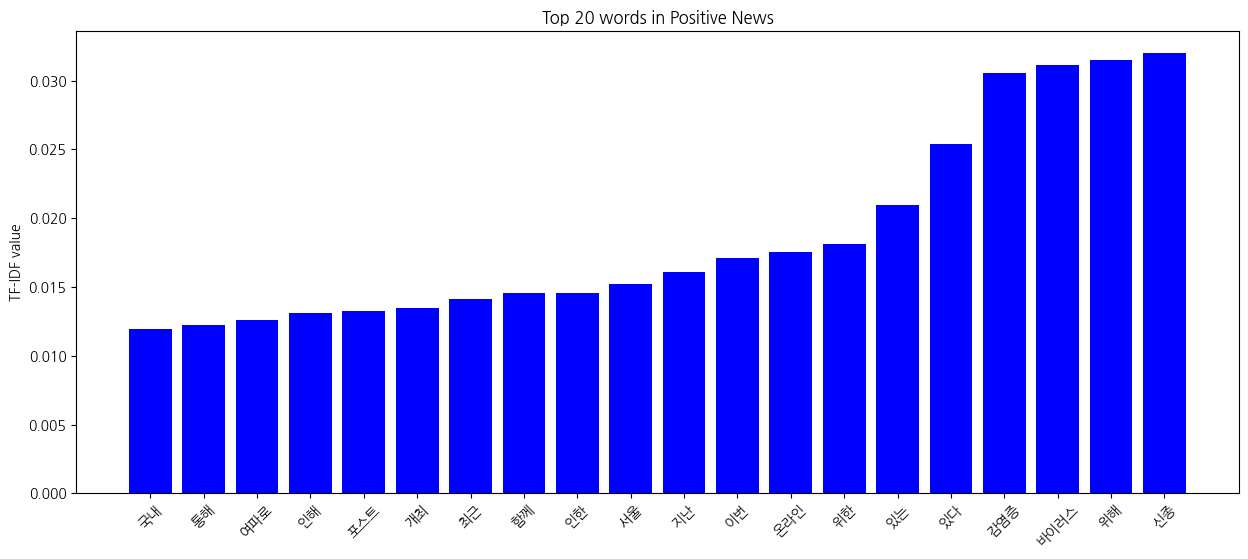

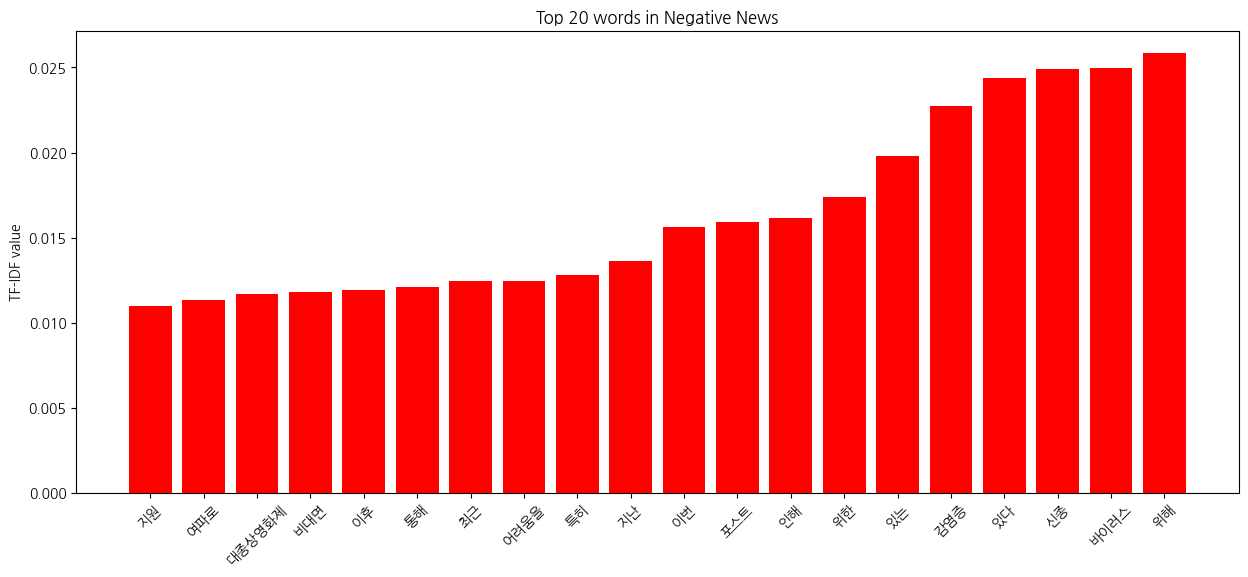

In [38]:
import matplotlib.pyplot as plt

# 데이터 추출
positive_words_data = positive_top_words[0][0]
positive_values_data = positive_top_words[0][1].tolist()[0]
negative_words_data = negative_top_words[0][0]
negative_values_data = negative_top_words[0][1].tolist()[0]

# 긍정적인 뉴스의 상위 20개 단어 그래프 그리기
plt.figure(figsize=(15, 6))
plt.bar(positive_words_data, positive_values_data, color='blue')
plt.xticks(rotation=45)
plt.title("Top 20 words in Positive News")
plt.ylabel("TF-IDF value")
plt.show()

# 부정적인 뉴스의 상위 20개 단어 그래프 그리기
plt.figure(figsize=(15, 6))
plt.bar(negative_words_data, negative_values_data, color='red')
plt.xticks(rotation=45)
plt.title("Top 20 words in Negative News")
plt.ylabel("TF-IDF value")
plt.show()

## 비슷한 그룹의 뉴스 그룹핑

In [39]:
from sklearn.cluster import KMeans

# 전체 뉴스 텍스트에 대해 TF-IDF 벡터화
tfidf_vectorizer_all = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)
tfidf_all = tfidf_vectorizer_all.fit_transform(data_cp949['combined'])

# K-means 클러스터링
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_all)

# 각 클러스터별 대표적인 단어들을 확인
cluster_top_words = {}
for i in range(num_clusters):
    cluster_center = kmeans.cluster_centers_[i]
    top_indices = cluster_center.argsort()[-10:][::-1]
    top_words = np.array(tfidf_vectorizer_all.get_feature_names_out())[top_indices]
    cluster_top_words[i] = top_words

cluster_top_words

{0: array(['위해', '대종상영화제', '이번', '위한', '인해', '온라인', '통해', '참석한', '마스크', '최근'],
       dtype=object),
 1: array(['신종', '바이러스', '감염증', '있다', '확진', '확진자', '따르면', '지난', '리치웨이', '판정을'],
       dtype=object),
 2: array(['오후', '서울', '서울의료원', '수고해', '중랑구', '잠시멈춤', '서울의료원에서', '진료를', '콘서트',
        '위해'], dtype=object),
 3: array(['포스트', '디지털', '클라우드', '시대', '데이터', '언택트', '새로운', '글로벌', '비대면',
        '시대에'], dtype=object),
 4: array(['있는', '어려움을', '겪고', '장기화로', '위해', '지원', '이번', '인해', '지역', '겪는'],
       dtype=object)}

In [40]:
pd.DataFrame.from_dict(cluster_top_words)

,0,1,2,3,4
0,위해,신종,오후,포스트,있는
1,대종상영화제,바이러스,서울,디지털,어려움을
2,이번,감염증,서울의료원,클라우드,겪고
3,위한,있다,수고해,시대,장기화로
4,인해,확진,중랑구,데이터,위해
5,온라인,확진자,잠시멈춤,언택트,지원
6,통해,따르면,서울의료원에서,새로운,이번
7,참석한,지난,진료를,글로벌,인해
8,마스크,리치웨이,콘서트,비대면,지역
9,최근,판정을,위해,시대에,겪는


## 비슷한 키워드 뉴스 추천

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# "확진자" 키워드의 TF-IDF 벡터 생성
keyword_vector = tfidf_vectorizer_all.transform(["확진자"])

# 유사도 계산
similarities = cosine_similarity(keyword_vector, tfidf_all)

# 가장 유사한 뉴스 기사 5개의 인덱스 추출
top_indices = similarities.argsort()[0, -5:][::-1]

# 추천된 뉴스 기사 출력
recommended_news = data_cp949.iloc[top_indices]
recommended_news[['title', 'description']]

,title,description
570,속보 강서구 코로나 확진자 명 추가 발생 리치웨이 관련,강서구 코로나 확진자 명이 추가 발생했다 일 강서구청은 코로나 확진자 ...
643,금천구 코로나 확진자 근무지에 출장 선별진료소 운영,금천구 구청장 유성훈 는 번 번 확진자가 발생한 지난 일 오후 번 확진자 세 ...
576,의성군 코로나 확진자 모두 완치 청정지역 부각,받으며 코로나 청정 지역이 됐다 의성군 재난안전대책본부에 따르면 남아있던 환자...
68,전문 남양주시청 번째 확진자 발생 동선공개 화도읍 마석우리 서희스타,남양주시청이 코로나 번째 확진자 발생을 알렸다 남양주시 번째 확진자는 세...
732,경기도 누적 확진자 명 넘어 일만에 명,경기도는 일 시 기준 코로나 누적 확진자가 명으로 전날보다 명 증가했다...


In [57]:
# 사용자 입력을 받아 감성 분석 결과를 출력하는 함수

def sentiment_analysis():
    test = input('감성 분석할 문장입력 >> ')

    # 입력 텍스트에 대한 전처리 수행
    test = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(test)
    test = [" ".join(test)]

    # 입력 텍스트의 피처 벡터화
    test_tfidf = tfidf_vectorizer.transform(test)

    # 감성분석 모델에 적용하여 감성 분석 평가
    test_predict = logreg_combined.predict(test_tfidf)

    # 예측 값 출력하기
    if(test_predict == 0):
        return test[0] + " ->> 부정 감성"
    else:
        return test[0] + " ->> 긍정 감성"

# 함수를 실행하여 결과 확인
sentiment_result = sentiment_analysis()
sentiment_result

감성 분석할 문장입력 >> 코로나 감염증 확산


'코로나 감염증 확산 ->> 긍정 감성'